<font color='blue' size='9.5'><b><i>
    Campus Recruitment: EDA and Classification</b></i>
</font>

<font size='2'>Durgesh Samariya | The ML PhD Student</font>

![]()
<center>
    <img src='https://d8it4huxumps7.cloudfront.net/bites/wp-content/banners/2020/7/5f02f3ca4efab_campus_recruitment_process_heres_everything_you_need_to_know.png?d=700x400'>
    <font size='1'> Source: https://d8it4huxumps7.cloudfront.net/bites/wp-content/banners/2020/7/5f02f3ca4efab_campus_recruitment_process_heres_everything_you_need_to_know.png?d=700x400 </font>
</center>


<font color='red' size='5'>
    <center>
        Please Upvote my kernel if you like my work.
    </center>
</font>

<a id="top"></a>
## Table of Content

* [1. Summary](#1)
* [2. Loading and Exploring Data](#2)
    - [2.1 Loading libraries required and reading the data into Python DataFrame](#2.1)
    - [2.2 Data size and structure](#2.2)
* [3. Exploring features and relation with target class](#4)
    - [3.1. Target Class; Status](#4.1)
    - [3.2. Gender](#4.2)
    - [3.3. SSC Percentage](#4.3)
    - [3.4. SSC Board](#4.4)
    - [3.5. HSC Percentage](#4.5)
    - [3.6. HSC Board](#4.6)
    - [3.7. HSC Specialization](#4.7)
    - [3.8. Degree Percentage](#4.8)
    - [3.9. Degree Type](#4.9)
    - [3.10. Work Experience](#4.10)
    - [3.11. Employment Test Percentage](#4.11)
    - [3.12. MBA Specialization](#4.12)
    - [3.13. MBA Percentage](#4.13)
    - [3.14. Most Important Factor; Salary](#4.14)
    - [3.15. Correlation between features](#4.15)
* [4. Feature mapping and generation](#5)
    - [4.1. Additional feature generation](#5.1)
* [5. Model Prediction](#6)
    - [5.1. Train and Test Split](#6.1)
    - [5.2. KNN Classification](#6.2)
    - [5.3. Decision Tree Classification](#6.3)
    - [5.4. Support Vector Machine](#6.4)
    - [5.5. Random Forest](#6.5)
    - [5.6. Gaussian Naive Bayes](#6.6)
    - [5.7. Stochastic Gradient Descent](#6.7)
    - [5.8. Linear SVC](#6.8)
    - [5.9. Best Performing Model](#6.9)

<a id='#1'></a>
<font color="darkslateblue" size=+2.5><b>1. Summary</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

<font size=3>Campus placement or campus recruiting is a program conducted within universities or other educational institutions to provide jobs to students nearing completion of their studies. </font>
<center>
    <img src='https://annamacharyagroup.org/wp-content/uploads/2018/05/Tip-for-campus-placements-2-05-2018.jpg'>
    <text size=2> Source: https://annamacharyagroup.org/wp-content/uploads/2018/05/Tip-for-campus-placements-2-05-2018.jpg</text>
</center>
<hr>

<font size=5>Problem Statement:</font>

XYZ University wants to build machine learning model to know whethere student will get placed or not. So that they can provide special attention and help them to get job. Given dataset can be trated as classification or regression problem. In this project, I am going to focus on classification problem, where task is to find whethere candidate will placed or not. This is binary classification problem.

In this project, I used following classification algorithms.
- KNN Classification
- Decision Tree Classification
- Support Vector Machine
- Random Forest
- Gaussian Naive Bayes
- Stochastic Gradient Descent
- Linear SVC

<a id='#2'></a>
<font color="darkslateblue" size=+2.5><b>2. Loading and Exploring Data</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

<a id='#2.1'></a>
<font color="darkslateblue" size=3.5><b>2.1. Loading libraries required and reading the data into Python DataFrame</b></font>

In [1]:
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# setting color for all graphs
colors = ['#e79c2a','#d54062', '#ebdc87', '#ffa36c']
sns.set_palette(sns.color_palette(colors))

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


In [2]:
data = pd.read_csv("/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv")

<a id='#2.2'></a>
<font color="darkslateblue" size=3.5><b>2.2. Data size and Structure</b></font>

Let's have look at example samples.

In [3]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### Features in data.

In [4]:
print('='*50)
print("Columns in data")
print('='*50)
print(data.columns.values)

Columns in data
['sl_no' 'gender' 'ssc_p' 'ssc_b' 'hsc_p' 'hsc_b' 'hsc_s' 'degree_p'
 'degree_t' 'workex' 'etest_p' 'specialisation' 'mba_p' 'status' 'salary']


### Let's have look at each column information.

* sl_no : Serial Number

* gender : Candidate gender --> Male='M',Female='F'

* ssc_p : SSC (10th) Percentage

* ssc_b : SSC Board of Education --> Central (or) Others

* hsc_p : HSC (12th) percentage

* hsc_b : HSC Board of Education --> Central/ Others

* hsc_s : Specialization in HSC

* degree_p : Degree Percentage

* degree_t : Under Graduation (Degree type)- Field of degree education

* workex : Work Experience

* etest_p : Employability test percentage ( conducted by college)

* specialisation : Post Graduation(MBA)- Specialization

* mba_p : MBA percentage

* status : Status of placement- Placed/Not placed

* salary : Salary offered by corporate to candidates

In [5]:
print('='*20)
print("Data shape")
print('='*20)
print(data.shape)

Data shape
(215, 15)


We have only 215 samples in our dataset. I hope this is enough to train models.

In [6]:
print('='*50)
print("\nDescribe data\n")
print('='*50) 
print(data.describe())


Describe data

            sl_no       ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean   108.000000   67.303395   66.333163   66.370186   72.100558   62.278186   
std     62.209324   10.827205   10.897509    7.358743   13.275956    5.833385   
min      1.000000   40.890000   37.000000   50.000000   50.000000   51.210000   
25%     54.500000   60.600000   60.900000   61.000000   60.000000   57.945000   
50%    108.000000   67.000000   65.000000   66.000000   71.000000   62.000000   
75%    161.500000   75.700000   73.000000   72.000000   83.500000   66.255000   
max    215.000000   89.400000   97.700000   91.000000   98.000000   77.890000   

              salary  
count     148.000000  
mean   288655.405405  
std     93457.452420  
min    200000.000000  
25%    240000.000000  
50%    265000.000000  
75%    300000.000000  
max    940000.000000  


In [7]:
print('='*50)
print("\nData Information\n")
print('='*50) 
print(data.info())


Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB
None


As it is clear that we don't need sl_no in training model or in EDA. Thus I am dropping sl_no column. Rest of them I will keep as it is. After performing EDA I will drop other if needed.

In [8]:
data = data.drop(['sl_no'], axis=1)

<a id='#4'></a>
<font color="darkslateblue" size=+2.5><b>3. Exploring important features</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

<a id='#4.1'></a>
<font color="darkslateblue" size=3.5><b>3.1. The Class Variable; Status</b></font>

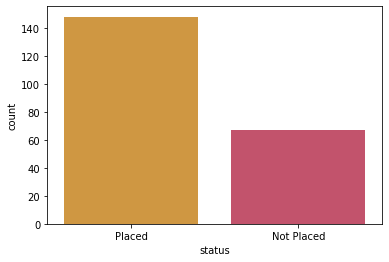

In [9]:
sns.countplot('status', data=data)

<a id='#4.2'></a>
<font color="darkslateblue" size=3.5><b>3.2. Gender</b></font>

Let's check whethere gender affect on placement.
- Out of 215 candidates, 139 are male and 76 are female.

In [10]:
data['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

In [11]:
df = pd.DataFrame(data.groupby(['gender','status'])['status'].count())
df

status
gender status            
F      Not Placed      28
       Placed          48
M      Not Placed      39
       Placed         100

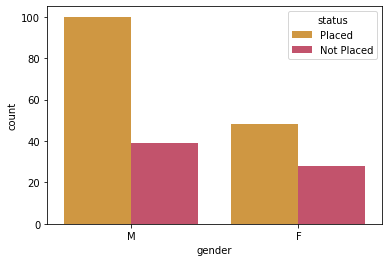

In [12]:
sns.countplot(x='gender', hue='status', data=data)

Male have high chances of getting placed compared to females.

<a id='#4.3'></a>
<font color="darkslateblue" size=3.5><b>3.3. SSC Percentage</b></font>

Text(0.5, 0, 'SSC %')

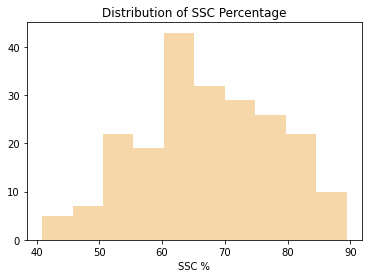

In [13]:
sns.distplot(data['ssc_p'], kde=False)
plt.title('Distribution of SSC Percentage')
plt.xlabel('SSC %')

Text(10.049999999999997, 0.5, 'SSC %')

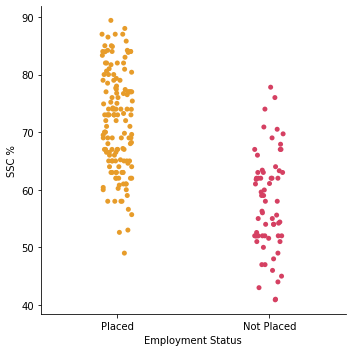

In [14]:
sns.catplot(y='ssc_p', x='status', data=data)
plt.xlabel('Employment Status')
plt.ylabel('SSC %')

Students who are place have higer percentage in SSC.

<a id='#4.4'></a>
<font color="darkslateblue" size=3.5><b>3.4. SSC Board</b></font>

In [15]:
data['ssc_b'].value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

In [16]:
df = pd.DataFrame(data.groupby(['ssc_b','status'])['status'].count())
df

status
ssc_b   status            
Central Not Placed      38
        Placed          78
Others  Not Placed      29
        Placed          70

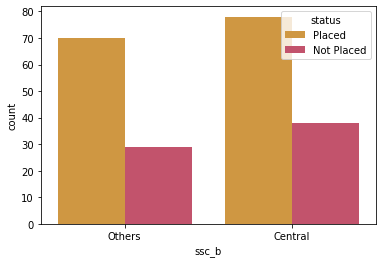

In [17]:
sns.countplot(x='ssc_b', hue='status', data=data)

From the above analysis I can say that, SSC board is not important to recruiters when it come to hiring candidates.
So I am not going to use this feature while training model.

<a id='#4.5'></a>
<font color="darkslateblue" size=3.5><b>3.5. HSC Percentage </b></font>

Text(0.5, 0, 'HSC %')

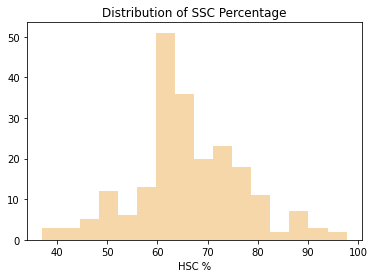

In [18]:
sns.distplot(data['hsc_p'], kde=False)
plt.title('Distribution of SSC Percentage')
plt.xlabel('HSC %')

Text(3.674999999999997, 0.5, 'HSC %')

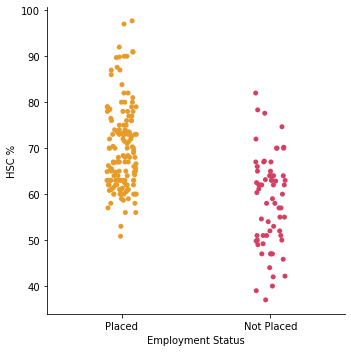

In [19]:
sns.catplot(y='hsc_p', x='status', data=data)
plt.xlabel('Employment Status')
plt.ylabel('HSC %')

HSC percentage are important features. As all placed students have higher percentages.

<a id='#4.6'></a>
<font color="darkslateblue" size=3.5><b>3.6. HSC Board</b></font>

In [20]:
data['hsc_b'].value_counts()

Others     131
Central     84
Name: hsc_b, dtype: int64

In [21]:
df = pd.DataFrame(data.groupby(['hsc_b','status'])['status'].count())
df

status
hsc_b   status            
Central Not Placed      27
        Placed          57
Others  Not Placed      40
        Placed          91

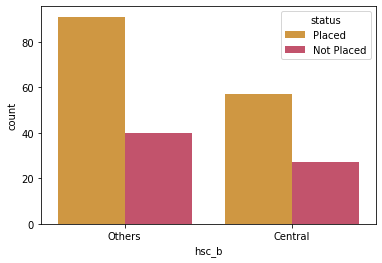

In [22]:
sns.countplot(x='hsc_b', hue='status', data=data)

From the above analysis I can say that, SSC board is not important to recruiters when it come to hiring candidates.
So I am not going to use this feature while training model.

<a id='#4.7'></a>
<font color="darkslateblue" size=3.5><b>3.7. HSC Specialisation</b></font>

In [23]:
data['hsc_s'].value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

In [24]:
df = pd.DataFrame(data.groupby(['hsc_s','status'])['status'].count())
df

status
hsc_s    status            
Arts     Not Placed       5
         Placed           6
Commerce Not Placed      34
         Placed          79
Science  Not Placed      28
         Placed          63

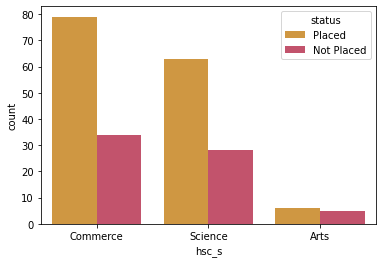

In [25]:
sns.countplot(x='hsc_s', hue='status', data=data)

<a id='#4.8'></a>
<font color="darkslateblue" size=3.5><b>3.8. Degree Percentage</b></font>

Text(0.5, 0, 'Degree %')

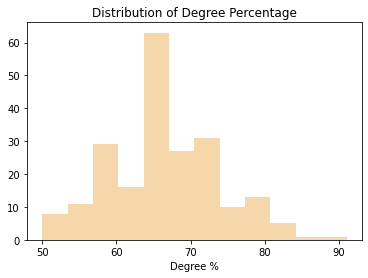

In [26]:
sns.distplot(data['degree_p'], kde=False)
plt.title('Distribution of Degree Percentage')
plt.xlabel('Degree %')

Text(10.049999999999997, 0.5, 'Degree %')

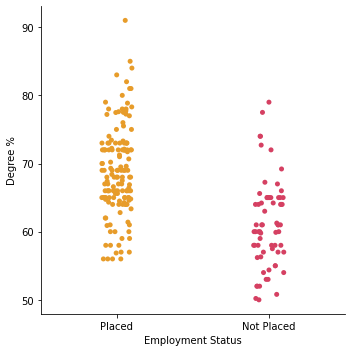

In [27]:
sns.catplot(y='degree_p', x='status', data=data)
plt.xlabel('Employment Status')
plt.ylabel('Degree %')

Like SSC and HSC percentages, Degree Percentages are also impotant factor to get placed.

<a id='#4.9'></a>
<font color="darkslateblue" size=3.5><b>3.9. Degree Type</b></font>

In [28]:
data['degree_t'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [29]:
df = pd.DataFrame(data.groupby(['degree_t','status'])['status'].count())
df

status
degree_t  status            
Comm&Mgmt Not Placed      43
          Placed         102
Others    Not Placed       6
          Placed           5
Sci&Tech  Not Placed      18
          Placed          41

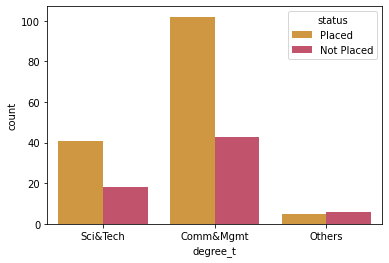

In [30]:
sns.countplot(x='degree_t', hue='status', data=data)

<a id='#4.10'></a>
<font color="darkslateblue" size=3.5><b>3.10. Work Experience</b></font>

In [31]:
data['workex'].value_counts()

No     141
Yes     74
Name: workex, dtype: int64

In [32]:
df = pd.DataFrame(data.groupby(['workex','status'])['status'].count())
df

status
workex status            
No     Not Placed      57
       Placed          84
Yes    Not Placed      10
       Placed          64

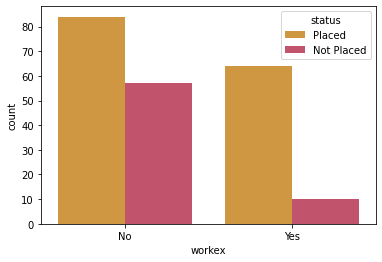

In [33]:
sns.countplot(x='workex', hue='status', data=data)

It is clear that candidate with work experience have higher chance of getting placed.

<a id='#4.11'></a>
<font color="darkslateblue" size=3.5><b>3.11. Employment Test Percentage</b></font>

Text(0.5, 0, 'Employment Test %')

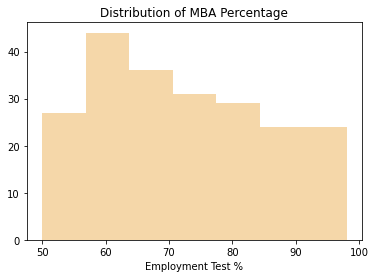

In [34]:
sns.distplot(data['etest_p'], kde=False)
plt.title('Distribution of MBA Percentage')
plt.xlabel('Employment Test %')

Text(3.674999999999997, 0.5, 'Employment Test %')

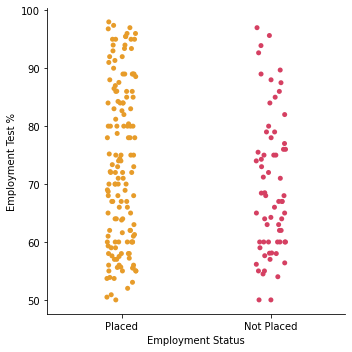

In [35]:
sns.catplot(y='etest_p', x='status', data=data)
plt.xlabel('Employment Status')
plt.ylabel('Employment Test %')

<a id='#4.12'></a>
<font color="darkslateblue" size=3.5><b>3.12. MBA Specialization</b></font>

In [36]:
data['specialisation'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [37]:
df = pd.DataFrame(data.groupby(['specialisation','status'])['status'].count())
df

status
specialisation status            
Mkt&Fin        Not Placed      25
               Placed          95
Mkt&HR         Not Placed      42
               Placed          53

Text(0.5, 0, 'MBA Specialization')

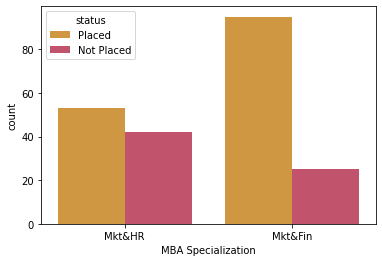

In [38]:
sns.countplot(x='specialisation', hue='status', data=data)
plt.xlabel('MBA Specialization')

<a id='#4.13'></a>
<font color="darkslateblue" size=3.5><b>3.13. MBA Percentage</b></font>

Text(0.5, 0, 'MBA %')

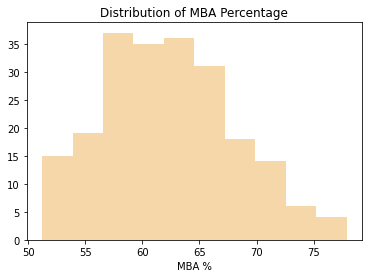

In [39]:
sns.distplot(data['mba_p'], kde=False)
plt.title('Distribution of MBA Percentage')
plt.xlabel('MBA %')

Text(10.049999999999997, 0.5, 'MBA %')

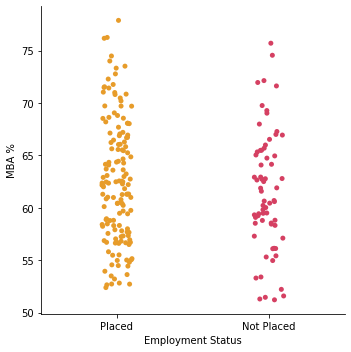

In [40]:
sns.catplot(y='mba_p', x='status', data=data)
plt.xlabel('Employment Status')
plt.ylabel('MBA %')

<a id='#4.14'></a>
<font color="darkslateblue" size=3.5><b>3.14. Most Important Factor; Salary</b></font>

Text(0.5, 0, 'Salary')

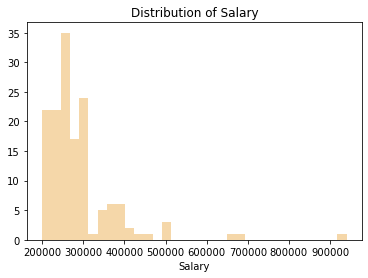

In [41]:
sns.distplot(data['salary'], kde=False)
plt.title('Distribution of Salary')
plt.xlabel('Salary')

Text(-15.450000000000003, 0.5, 'Salary')

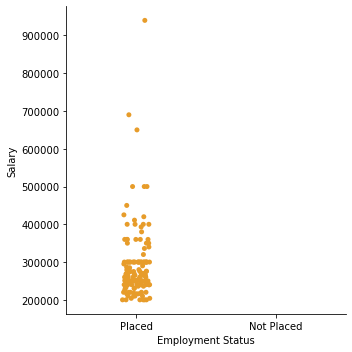

In [42]:
sns.catplot(y='salary', x='status', data=data)
plt.xlabel('Employment Status')
plt.ylabel('Salary')

It is obvious, we dont have salary details of Un-Placed candidate. Salary feature alone is enough to classify the placement status of candidate (if salary > 0 then placed else not placed). However, if we want to use only salary feature then we dont need machine learning for that, by looking only we can do that. So I am going to drop this column while performing classification model training.

<a id='#4.15'></a>
<font color="darkslateblue" size=3.5><b>3.15. Correlation between features</b></font>

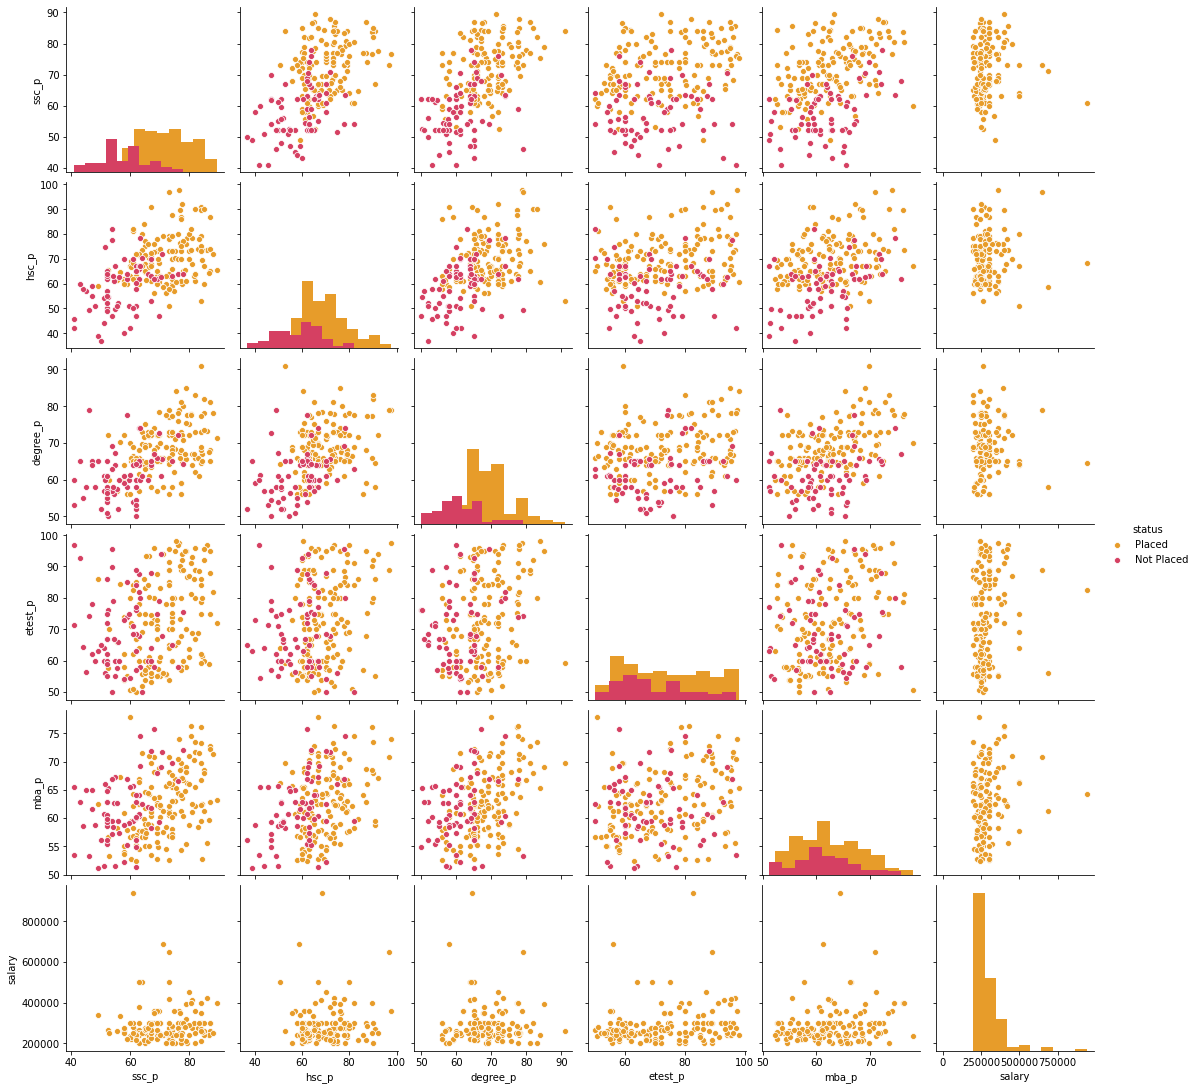

In [43]:
sns.pairplot(data=data[['ssc_p','hsc_p','degree_p', 'etest_p','mba_p','salary', 'status']], hue="status", diag_kind='hist')

<a id='#5'></a>
<font color="darkslateblue" size=+2.5><b>4. Feature mapping and generation</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Let's drop all unwanted columns as menstioned in above section.
- SSC Board
- HSC Board
- HSC Specialisation
- Degree Type
- Salart

In [44]:
data.drop(['ssc_b','hsc_b', 'hsc_s', 'degree_t', 'salary'], axis=1, inplace=True)

Let's map categorical feature to numeric one.
Categorical features:
- Gender : Gender feature have male and female values. I am going to map 0 for male and 1 for female.
- Work Experience : Work Experience feature have Yes and No values. I am going to map 0 for No and 1 for Yes.
- Status : Status feature have Not Placed and Placed values. Again for this features I am mapping 0 for not placed and 1 for placed values.
- Specialisation : Specialisation feature have two values Mkt&HR and Mkt&Fin. I am going to map 0 to Mkt&HR and 1 to Mkt&Fin.

In [45]:
data["gender"] = data.gender.map({"M":0,"F":1})
data["workex"] = data.workex.map({"No":0, "Yes":1})
data["status"] = data.status.map({"Not Placed":0, "Placed":1})
data["specialisation"] = data.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

In [46]:
data.columns

Index(['gender', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p',
       'specialisation', 'mba_p', 'status'],
      dtype='object')

In [47]:
data.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,0,67.00,91.00,58.00,0,55.0,0,58.80,1
1,0,79.33,78.33,77.48,1,86.5,1,66.28,1
2,0,65.00,68.00,64.00,0,75.0,1,57.80,1
3,0,56.00,52.00,52.00,0,66.0,0,59.43,0
4,0,85.80,73.60,73.30,0,96.8,1,55.50,1


<a id='#5.1'></a>
<font color="darkslateblue" size=3.5><b>4.1. Additional feature generation</b></font>

In [48]:
def new_features(df):
    df['hsc_to_ssc'] = df['hsc_p'] / df['ssc_p']
    df['degree_to_hsc'] = df['degree_p'] / df['hsc_p']
    df['degree_to_ssc'] = df['degree_p'] / df['ssc_p']
    df['mba_to_degree'] = df['mba_p'] / df['degree_p']
    df['mba_to_etest'] = df['mba_p'] / df['etest_p']
        
    return df

In [49]:
data = new_features(data)

<a id='#6'></a>
<font color="darkslateblue" size=+2.5><b>5. Model Prediction</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Now our data is ready to prepare model to predict solution. There is plenty of predictive algorithm out there to try. In this project, I am going to use classification and regression algorithms.

<a id='#6.1'></a>
<font color="darkslateblue" size=3.5><b>5.1. Train and Test Split</b></font>

In [50]:
# Seperating Features and Target
X = data.copy().drop('status', axis=1)
y = data['status']

In [51]:
# scale each features
X_scaled = preprocessing.scale(X)

In [52]:
#Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.3)
X_train.shape, Y_train.shape, X_test.shape

((150, 13), (150,), (65, 13))

<a id='#6.2'></a>
<font color="darkslateblue" size=3.5><b>5.2. KNN Classification</b></font>

In [53]:
# k-nearest neighbor
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
knn_Y_pred = knn.predict(X_test)
knn_accuracy = knn.score(X_test, Y_test)
knn_accuracy

0.8769230769230769

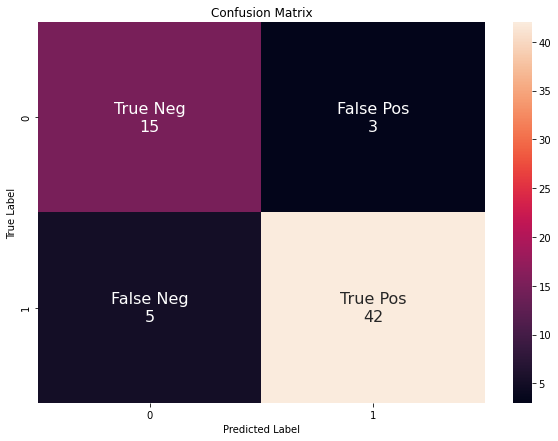

In [54]:
# creating confusion matrix heatmap

conf_mat = confusion_matrix(Y_test, knn_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [55]:
# getting precision, recall and f1-score via classification report

print(classification_report(Y_test, knn_Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        18
           1       0.93      0.89      0.91        47

    accuracy                           0.88        65
   macro avg       0.84      0.86      0.85        65
weighted avg       0.88      0.88      0.88        65



<a id='#6.3'></a>
<font color="darkslateblue" size=3.5><b>5.3. Decision Tree Classification</b></font>

In [56]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
decision_tree_Y_pred = decision_tree.predict(X_test)
decision_tree_accuracy = decision_tree.score(X_test, Y_test)
decision_tree_accuracy

0.8615384615384616

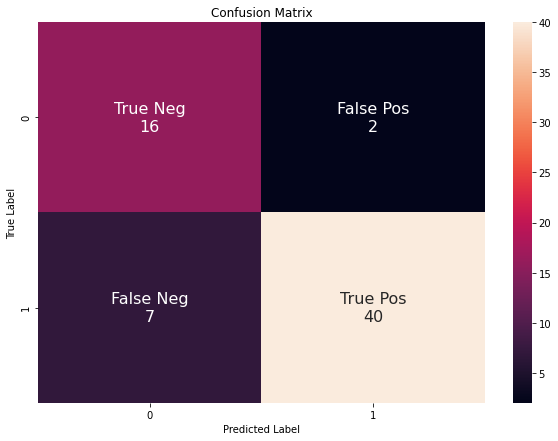

In [57]:
# creating confusion matrix heatmap

conf_mat = confusion_matrix(Y_test, decision_tree_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [58]:
# getting precision, recall and f1-score via classification report

print(classification_report(Y_test, decision_tree_Y_pred))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78        18
           1       0.95      0.85      0.90        47

    accuracy                           0.86        65
   macro avg       0.82      0.87      0.84        65
weighted avg       0.88      0.86      0.87        65



<a id='#6.4'></a>
<font color="darkslateblue" size=3.5><b>5.4. Support Vector Machine</b></font>

In [59]:
# Support Vector Machine
svc = SVC()
svc.fit(X_train, Y_train)
svm_Y_pred = svc.predict(X_test)
svc_accuracy = svc.score(X_test, Y_test)
svc_accuracy

0.8615384615384616

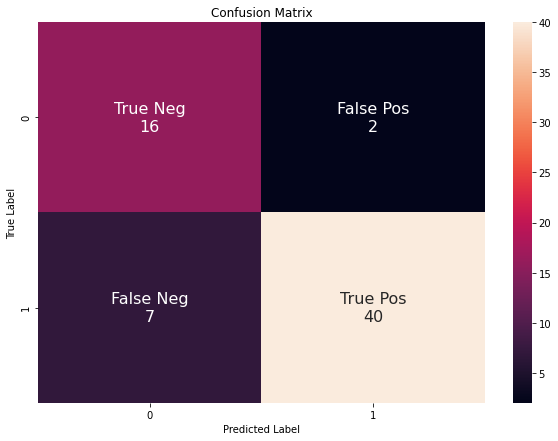

In [60]:
# creating confusion matrix heatmap

conf_mat = confusion_matrix(Y_test, svm_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [61]:
# getting precision, recall and f1-score via classification report

print(classification_report(Y_test, svm_Y_pred))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78        18
           1       0.95      0.85      0.90        47

    accuracy                           0.86        65
   macro avg       0.82      0.87      0.84        65
weighted avg       0.88      0.86      0.87        65



<a id='#6.5'></a>
<font color="darkslateblue" size=3.5><b>5.5. Random Forest</b></font>

In [62]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, Y_train)
random_forest_Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
random_forest_accuracy = random_forest.score(X_test, Y_test)
random_forest_accuracy

0.8461538461538461

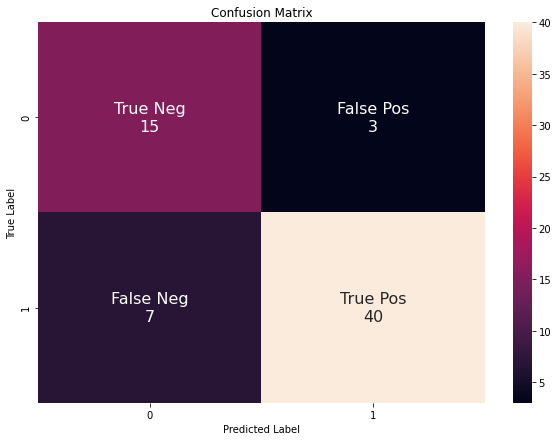

In [63]:
# creating confusion matrix heatmap

conf_mat = confusion_matrix(Y_test, random_forest_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [64]:
# getting precision, recall and f1-score via classification report

print(classification_report(Y_test, random_forest_Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75        18
           1       0.93      0.85      0.89        47

    accuracy                           0.85        65
   macro avg       0.81      0.84      0.82        65
weighted avg       0.86      0.85      0.85        65



<a id='#6.6'></a>
<font color="darkslateblue" size=3.5><b>5.6. Gaussian Naive Bayes</b></font>

In [65]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
gaussian_Y_pred = gaussian.predict(X_test)
gaussian_accuracy = gaussian.score(X_test, Y_test)
gaussian_accuracy

0.8153846153846154

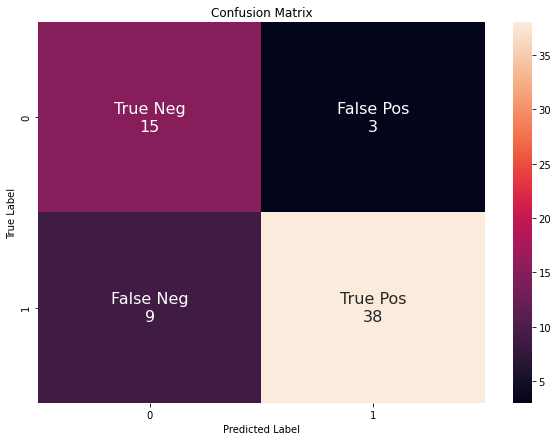

In [66]:
# creating confusion matrix heatmap

conf_mat = confusion_matrix(Y_test, gaussian_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [67]:
# getting precision, recall and f1-score via classification report

print(classification_report(Y_test, gaussian_Y_pred))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71        18
           1       0.93      0.81      0.86        47

    accuracy                           0.82        65
   macro avg       0.78      0.82      0.79        65
weighted avg       0.84      0.82      0.82        65



<a id='#6.7'></a>
<font color="darkslateblue" size=3.5><b>5.7. Stochastic Gradient Descent</b></font>

In [68]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
sgd_Y_pred = sgd.predict(X_test)
sgd_accuracy = sgd.score(X_test, Y_test)
sgd_accuracy

0.8923076923076924

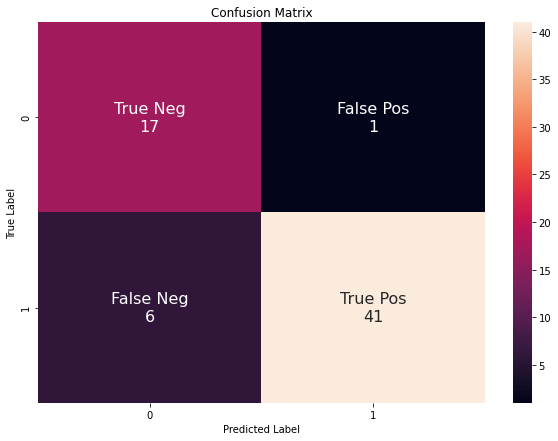

In [69]:
# creating confusion matrix heatmap

conf_mat = confusion_matrix(Y_test, sgd_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [70]:
# getting precision, recall and f1-score via classification report

print(classification_report(Y_test, sgd_Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83        18
           1       0.98      0.87      0.92        47

    accuracy                           0.89        65
   macro avg       0.86      0.91      0.88        65
weighted avg       0.91      0.89      0.90        65



<a id='#6.8'></a>
<font color="darkslateblue" size=3.5><b>5.8. Linear SVC</b></font>

In [71]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
linear_svc_Y_pred = linear_svc.predict(X_test)
linear_svc_accuracy = linear_svc.score(X_test, Y_test)
linear_svc_accuracy

0.8461538461538461

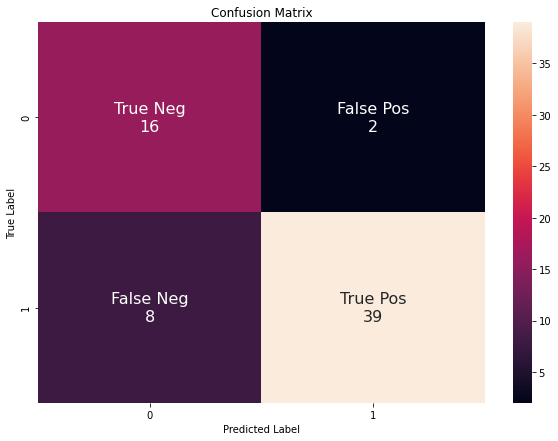

In [72]:
# creating confusion matrix heatmap

conf_mat = confusion_matrix(Y_test, linear_svc_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [73]:
# getting precision, recall and f1-score via classification report

print(classification_report(Y_test, linear_svc_Y_pred))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76        18
           1       0.95      0.83      0.89        47

    accuracy                           0.85        65
   macro avg       0.81      0.86      0.82        65
weighted avg       0.87      0.85      0.85        65



<a id='#6.9'></a>
<font color="darkslateblue" size=3.5><b>5.9. Best Performing Model</b></font>

In [74]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Linear SVC', 'Decision Tree','Random Forest', 'Stochastic Gradient Descent', 'Gaussian Naive Bayes'],
    'Score': [svc_accuracy, knn_accuracy, linear_svc_accuracy, decision_tree_accuracy, random_forest_accuracy, sgd_accuracy, gaussian_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,Stochastic Gradient Descent,0.892308
1,KNN,0.876923
0,Support Vector Machines,0.861538
3,Decision Tree,0.861538
2,Linear SVC,0.846154
4,Random Forest,0.846154
6,Gaussian Naive Bayes,0.815385


<font color='red' size=5>
    <center>
        I hope you enjoyed this kernel, Please don't forget to appreciate me with an Upvote. :)
    </center>
</font>